True

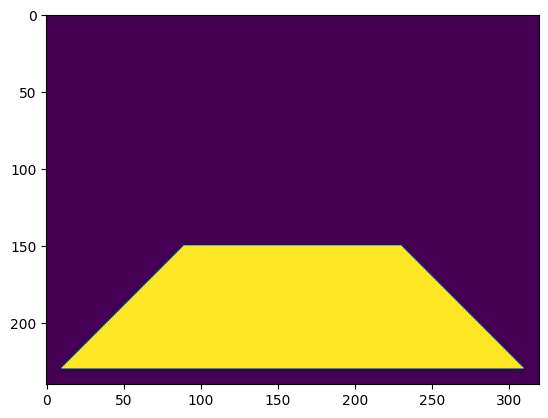

In [22]:
from generateAttentionArea import createAttetionArea
import matplotlib.pyplot as plt
import cv2
from glob import glob
import numpy as np

attetionArea = createAttetionArea((240, 320), top=150, bottom=230)
plt.imshow(attetionArea)
cv2.imwrite("attentionArea.png", attetionArea[150:231, :])

In [23]:
import matplotlib.pyplot as plt
from glob import glob
import cv2

In [24]:
imgs = sorted(glob("images/frame*"))
masks = sorted(glob("images/mask*"))

In [25]:
idx = 21
img = cv2.imread(imgs[idx], cv2.IMREAD_COLOR).astype(np.uint8)
mask = cv2.imread(masks[idx], cv2.IMREAD_GRAYSCALE).astype(np.uint8)

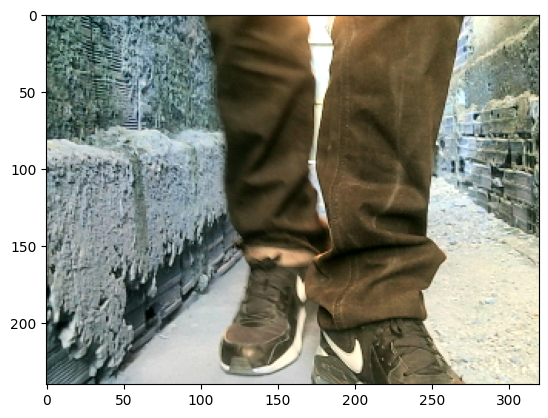

In [26]:
plt.imshow(img)


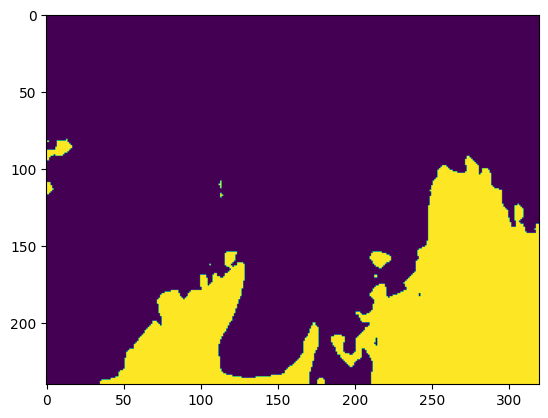

In [27]:
plt.imshow(mask)

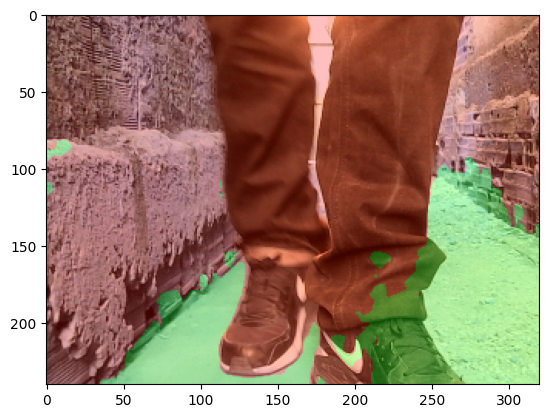

In [28]:
def maskToColor(mask):
    layer_1 = np.array(mask == 0) * 255
    layer_2 = np.array(mask == 1) * 255
    layer_3 = np.array(mask == 2) * 255
    return np.stack([layer_1, layer_2, layer_3], axis=-1).astype(np.uint8)

plt.imshow(cv2.addWeighted(img, 0.75, maskToColor(mask), 0.25, 0))

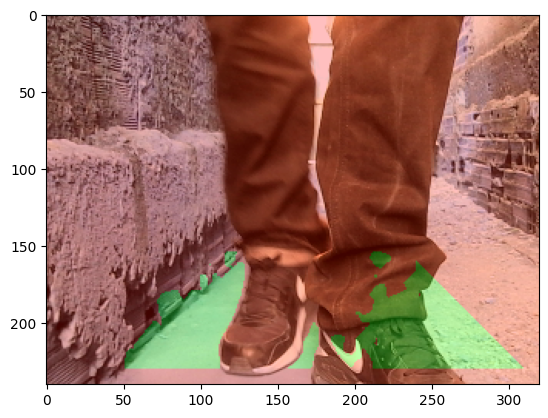

In [29]:
attetionArea = createAttetionArea((240, 320), top=150, bottom=230)
plt.imshow(cv2.addWeighted(img, 0.75, maskToColor(mask*attetionArea), 0.25, 0))


In [30]:
(mask*attetionArea).sum(), attetionArea.sum()

(7814, 17680)

In [31]:
import numpy as np
np.unique(mask)

array([0, 1], dtype=uint8)

True

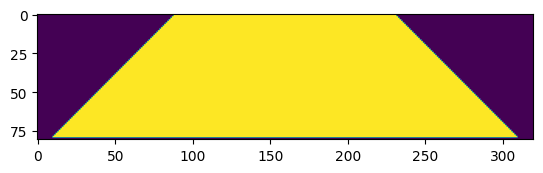

In [32]:
from generateAttentionArea import createAttetionArea
attetionArea = createAttetionArea((240, 320), top=150, bottom=230)[150:231, :]
plt.imshow(attetionArea)
cv2.imwrite("attentionArea.png", attetionArea)

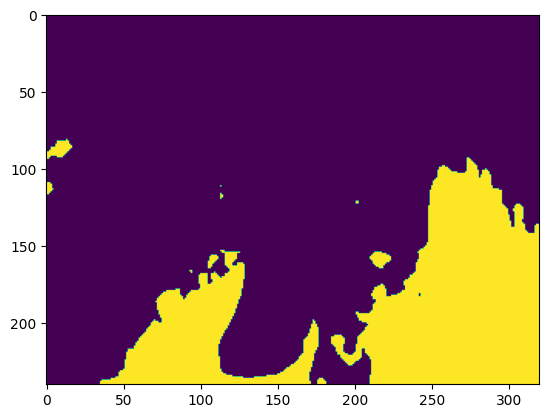

In [37]:
from aaah import run
maskTest = run("last_model.tflite", img, normalize=1)
plt.imshow(maskTest)

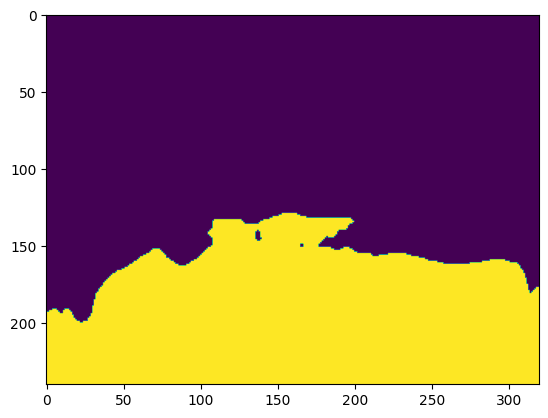

In [40]:
maskTest = run("last_model.ckpt.tflite", img)
plt.imshow(maskTest)

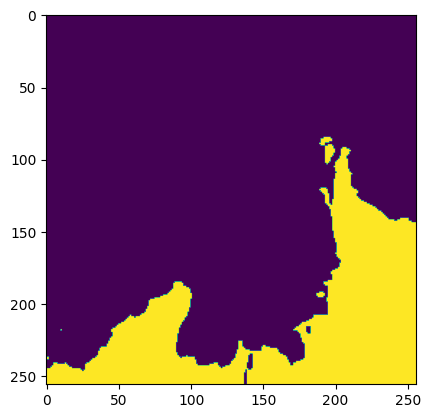

In [39]:
maskTest = run("fold_0_alpha_0.5_lr_1e-04_regularizer_l1_1e-04_l2_1e-05.tflite", cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA), normalize=127.5, offset=1)
plt.imshow(maskTest)